# Makine Öğrenmesi İle Müşteri Kayıp Tahmini

## Proje Girişi

Bu proje, **Churn** veri seti kullanılarak müşteri kaybını tahmin etmeyi amaçlamaktadır. Günümüzde rekabetin yoğun olduğu sektörlerde, özellikle telekomünikasyon ve abonelik tabanlı hizmetlerde, müşteri kaybı şirketlerin kârlılığı üzerinde doğrudan etkili olmaktadır. Müşterilerin hizmetten ayrılma kararları; kullanım süresi, aylık ücretler, toplam ödemeler, hizmet türleri ve demografik özellikler gibi birçok faktöre bağlıdır.
Bu nedenle, veri analizi ve makine öğrenmesi yöntemleri kullanılarak kayıp tahmini yapmak şirketler için kritik bir karar destek mekanizması sunmaktadır. Doğru tahminler sayesinde işletmeler risk altındaki müşterileri önceden belirleyebilir, müşteri memnuniyetini artıracak stratejiler geliştirebilir ve uzun vadede müşteri bağlılığını güçlendirebilir.

## Veri Setinde Bulunan Değişkenler

- **customerID**: Her müşteriye ait benzersiz kimlik numarası  
- **gender**: Müşterinin cinsiyeti (Kadın/Erkek)  
- **SeniorCitizen**: Müşterinin yaşlı olup olmadığını gösteren değişken (1 = yaşlı, 0 = değil)  
- **Partner**: Müşterinin eş/partner sahibi olup olmadığı bilgisi  
- **Dependents**: Müşterinin bakmakla yükümlü olduğu kişi (çocuk, aile bireyi vb.) olup olmadığı  
- **tenure**: Müşterinin şirkette kaldığı süre (ay cinsinden)  
- **PhoneService**: Telefon hizmeti alıp almadığı  
- **MultipleLines**: Birden fazla telefon hattı olup olmadığı  
- **InternetService**: İnternet hizmeti türü (DSL, Fiber, Yok)  
- **OnlineSecurity**: Online güvenlik hizmeti alıp almadığı  
- **OnlineBackup**: Online yedekleme hizmeti alıp almadığı  
- **DeviceProtection**: Cihaz koruma hizmeti alıp almadığı  
- **TechSupport**: Teknik destek hizmeti alıp almadığı  
- **StreamingTV**: TV yayın hizmeti alıp almadığı  
- **StreamingMovies**: Film yayın hizmeti alıp almadığı  
- **Contract**: Sözleşme türü (Aylık, 1 yıl, 2 yıl)  
- **PaperlessBilling**: Kağıtsız fatura kullanıp kullanmadığı  
- **PaymentMethod**: Ödeme yöntemi (Kredi kartı, Banka havalesi, Elektronik çek vb.)  
- **MonthlyCharges**: Müşterinin aylık ödediği ücret  
- **TotalCharges**: Müşterinin toplam ödediği ücret  
- **Churn**: Müşterinin hizmetten ayrılıp ayrılmadığını gösteren hedef değişken (Yes/No)  


## Projenin Amacı

Bu proje kapsamında, **Churn** veri seti üzerinde veri ön işleme,tanımlayıcı istatistikler ,aykırı değer analizi ve farklı sınıflandırma modelleri uygulanarak müşteri kaybının tahmin edilmesi hedeflenmiştir. Çalışmada lojistik regresyon, SVM, Random Forest ve XGBoost farklı modelleme teknikleri karşılaştırılmış, performans metrikleri (accuracy, precision, recall, F1-score, ROC-AUC) üzerinden en uygun model belirlenmeye çalışılmıştır. Böylece şirketlerin müşteri kaybını önceden tahmin ederek stratejik kararlar almasına yardımcı olacak bir karar destek mekanizması oluşturulmuştur.

## Kullanılan Kütüphaneler

In [110]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve , precision_score, recall_score , f1_score 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Veri Setinin Yüklenmesi Ve Ön İnceleme

In [172]:
customer = pd.read_csv("data/Churn.csv")
df = customer.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Veri setinde bağımlı değişken `Churn` ile birlikte toplam 21 değişken bulunmaktadır. Bunlardan 3'ü (`tenure` , `MonthlyCharges` , `TotalCharges` ) sayısal değişkenler , diğerleriyse kategorik değişkenlerdir. Ancak bazı değişkenler analiz kısmına katılmayacak , bazılarınınsa veri tipinde hatalar bulunmaktadır. Model kurarken hata almamak amacıyla önce gerekli düzeltmelerin yapılması gerekmektedir. 

## Eksik Gözlem Analizi ve Gerekli Ön işlemler

In [117]:
df.drop("customerID", axis=1, inplace=True)
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:"Yes", 0 : "No"})
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [118]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

### Veri Temizleme ve Dönüşüm

Veri setinde ilk olarak **customerID** sütunu kaldırılmıştır. Bu sütun yalnızca kimlik bilgisi içerdiğinden modelleme açısından anlamlı bir değişken değildir. Ardından **SeniorCitizen** sütunundaki 0 ve 1 değerleri daha anlaşılır olması için `"Yes"` ve `"No"` etiketlerine dönüştürülmüştür.  

**TotalCharges** sütunu sayısal tipe çevrilmiş ve hatalı ya da boş değerler `NaN` olarak işaretlenmiştir. Eksik değer analizi sonucunda yalnızca bu sütunda 11 eksik gözlem bulunmuştur. Bu eksik satırlar veri setinden çıkarılmış ve toplam gözlem sayısı 7043’ten **7032’ye** düşmüştür.  

## Bağımlı Değişken Analizi

In [121]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

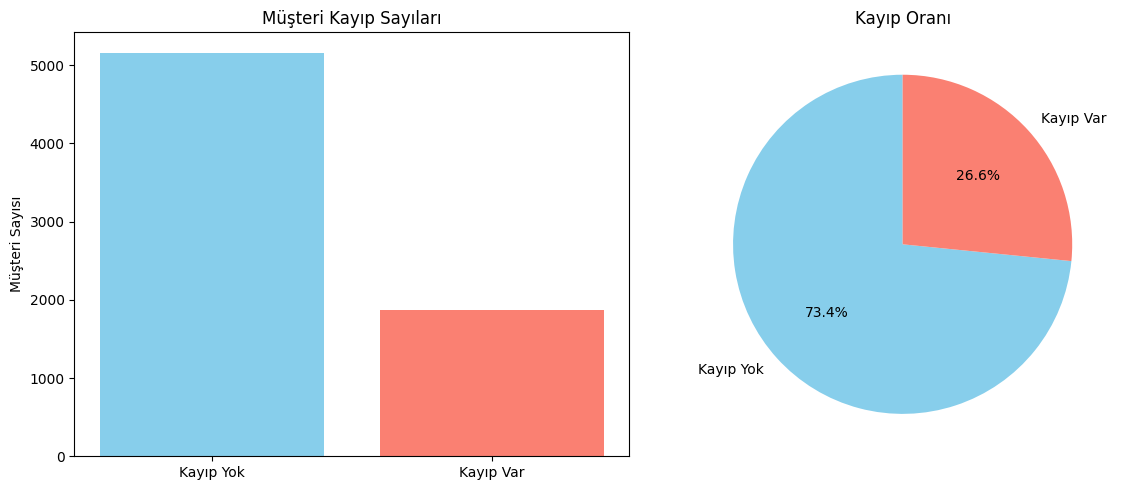

In [122]:
churn_counts = [5163, 1869]
labels = ["Kayıp Yok", "Kayıp Var"]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(labels, churn_counts, color=["skyblue","salmon"])
plt.title("Müşteri Kayıp Sayıları")
plt.ylabel("Müşteri Sayısı")
plt.subplot(1,2,2)
plt.pie(churn_counts, labels=labels, autopct="%1.1f%%", colors=["skyblue","salmon"], startangle=90)
plt.title("Kayıp Oranı")
plt.tight_layout()
plt.show()

### Müşteri Kayıp Analizi 

Veri setinde `Churn` değişkeni incelendiğinde:  
- **Kayıp Yok (No):** 5163 müşteri (%73,4)  
- **Kayıp Var (Yes):** 1869 müşteri (%26,6)  

Veri setinde **dengesiz sınıf dağılımı** söz konusudur. Kayıp olmayan müşteriler, kayıp yaşayanlara göre yaklaşık **3 kat daha fazladır**. Bu sebeple model performansı değerlendirilirken yalnızca doğruluk (accuracy) değil, **precision, recall ve F1-score** gibi metrikler de dikkate alınacaktır.  

## Aykırı Gözlem Analizi

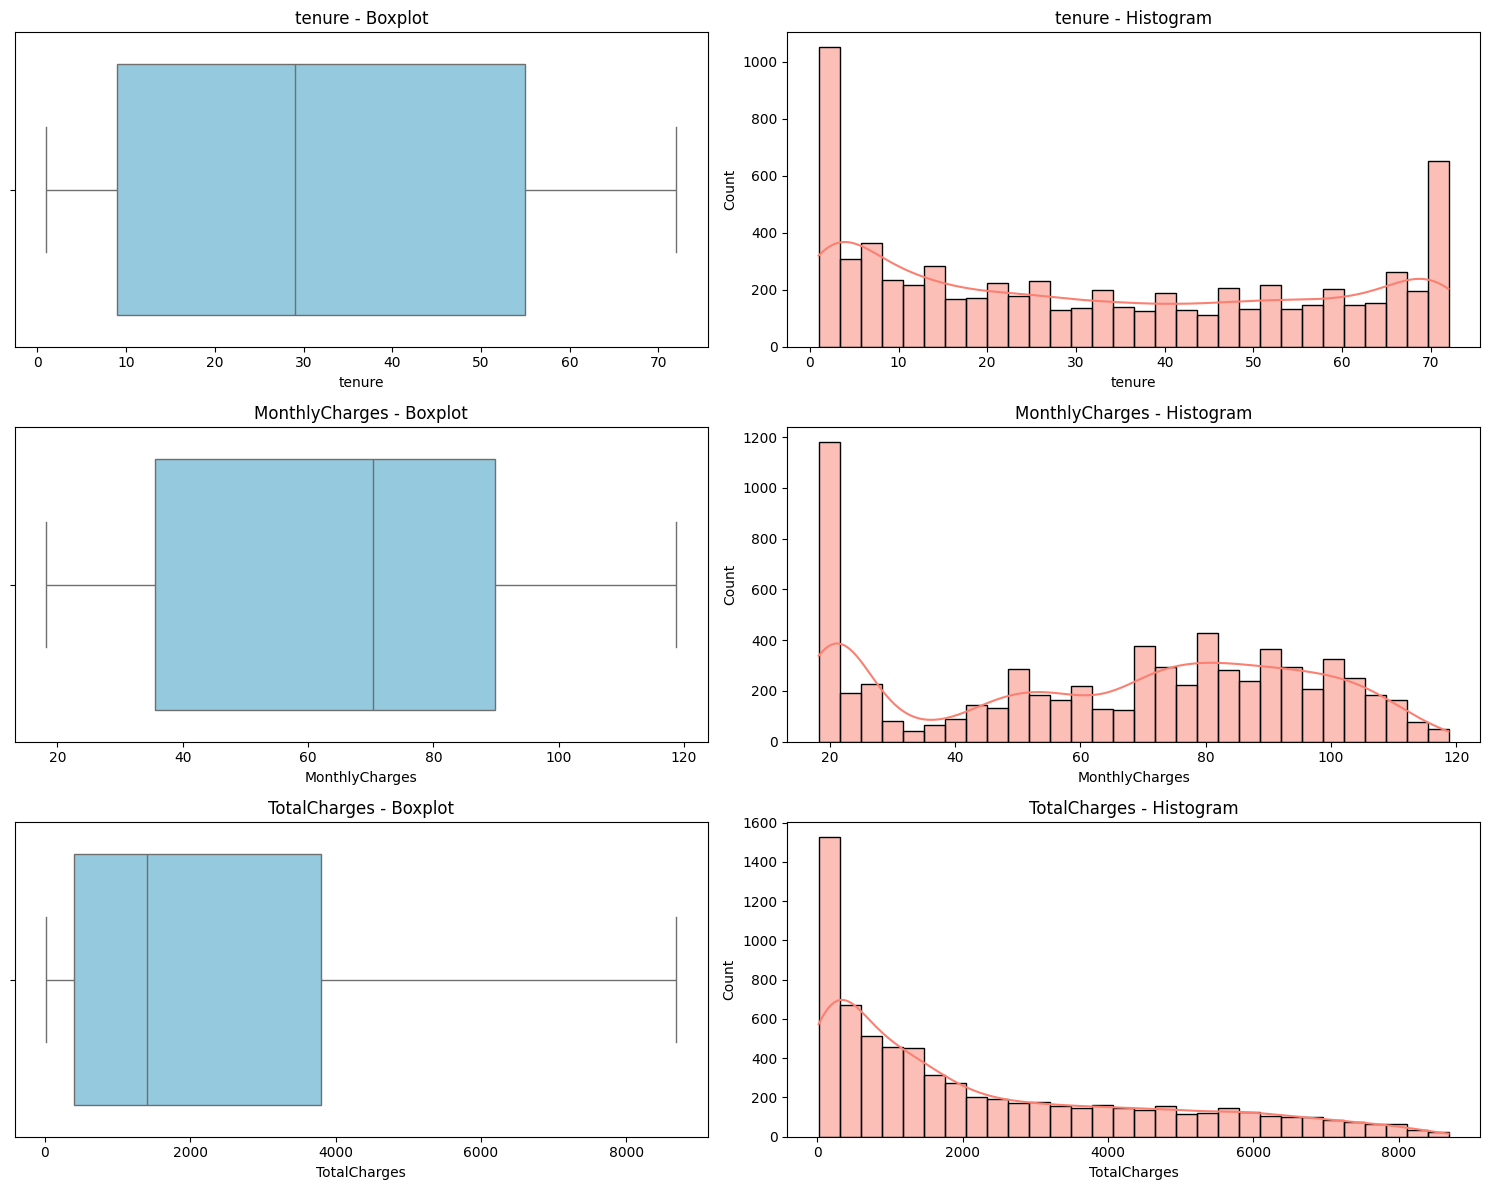

In [125]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i - 1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} - Boxplot")

    plt.subplot(len(num_cols), 2, 2*i)
    sns.histplot(df[col], bins=30, kde=True, color="salmon")
    plt.title(f"{col} - Histogram")

plt.tight_layout()
plt.show()

In [126]:
df_s = df[["tenure", "MonthlyCharges", "TotalCharges"]]

sc = StandardScaler()
df_s_sc = sc.fit_transform(df_s)

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
labels = clf.fit_predict(df_s_sc)

df["is_outlier"] = labels
outliers = df[labels == -1]
print("Aykırı değer sayısı:", outliers.shape[0])
print(outliers[["tenure","MonthlyCharges","TotalCharges"]].describe())
print("\n" ,df_s[["tenure","MonthlyCharges","TotalCharges"]].describe())


Aykırı değer sayısı: 211
           tenure  MonthlyCharges  TotalCharges
count  211.000000      211.000000    211.000000
mean    15.620853       56.154739   1135.806872
std     24.620323       33.179927   2311.774821
min      1.000000       18.700000     18.800000
25%      1.000000       24.850000     51.250000
50%      2.000000       48.950000     87.900000
75%     18.500000       75.550000    863.350000
max     72.000000      118.750000   8684.800000

             tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


### Aykırı Değer Analizi

Veri setindeki sayısal değişkenler (**tenure**, **MonthlyCharges**, **TotalCharges**) incelendiğinde bazı uç değerler tespit edilmiştir. Local Outlier Factor (LOF) yöntemiyle yapılan analiz sonucunda toplam **211 aykırı değer** bulunmuştur. Bu değerler veri setinin yaklaşık %3’ünü oluşturmaktadır.  

Aykırı değerler genellikle **kısa süreli müşteriler** ve **düşük toplam ödeme** yapan gruplardan oluşmaktadır. Ortalama tenure ve TotalCharges değerleri genel ortalamadan belirgin şekilde daha düşüktür.  

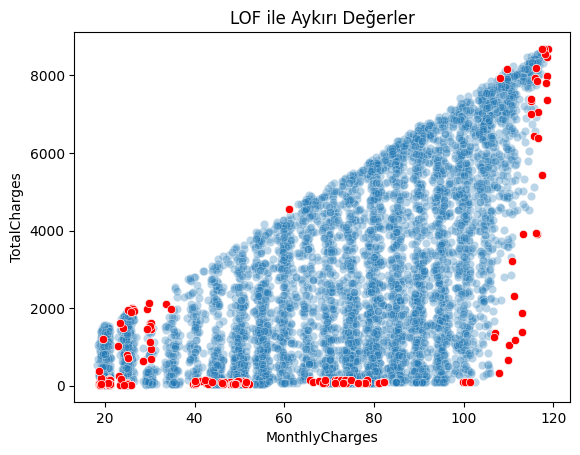

In [128]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", data=df, alpha=0.3)
sns.scatterplot(x=outliers["MonthlyCharges"], y=outliers["TotalCharges"], color="red")
plt.title("LOF ile Aykırı Değerler")
plt.show()

In [129]:
df = df.drop(index=outliers.index)
df = df.drop("is_outlier" , axis=1) 

### Aykırı Değerlerin Görselleştirilmesi ve Temizlenmesi

Scatterplot grafiğinde **MonthlyCharges** ile **TotalCharges** arasındaki ilişki incelenmiştir. Grafikte mavi noktalar genel müşteri dağılımını gösterirken, kırmızı noktalar **LOF algoritmasıyla aykırı değer olarak belirlenen müşterileri** temsil etmektedir. Bu görselleştirme sayesinde aykırı değerlerin veri setindeki konumu ve dağılımı net bir şekilde görülmüştür.  
Ardından aykırı değerler veri setinden çıkarılmış ve `is_outlier` sütunu da kaldırılmıştır. Böylece veri seti daha temiz ve homojen hale getirilmiştir.  

## Modelleme İçin Veri Hazırlığı

In [132]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
X = df.drop("Churn", axis=1)
y = df["Churn"]
X = pd.get_dummies(X, drop_first=True)

Bu adımda hedef değişken olan `Churn` yeniden kodlanmıştır. "Yes" değerleri **1**, "No" değerleri ise **0** olarak dönüştürülmüştür. Böylece Churn değişkeni ikili (binary) bir yapıya kavuşmuş ve sınıflandırma algoritmaları için uygun hale getirilmiştir.  

Ardından, bağımsız değişkenler (**X**) ile hedef değişken (**y**) ayrıştırılmıştır. Bu sayede modelleme sürecinde kullanılacak giriş ve çıkış değişkenleri net bir şekilde tanımlanmıştır.  

Son olarak, kategorik değişkenler üzerinde **one-hot encoding** uygulanmıştır. `pd.get_dummies` fonksiyonu ile kategorik değişkenler sayısal formata dönüştürülmüş, ayrıca `drop_first=True` parametresi kullanılarak **dummy trap** (çoklu doğrusal bağımlılık) problemi önlenmiştir.  

## Korelasyon Analizi

In [135]:
corr_with_target = pd.concat([X, y], axis=1).corr()["Churn"].sort_values(ascending=False)
print(corr_with_target)

Churn                                    1.000000
InternetService_Fiber optic              0.312265
PaymentMethod_Electronic check           0.300214
MonthlyCharges                           0.199217
PaperlessBilling_Yes                     0.189240
SeniorCitizen_Yes                        0.150103
StreamingTV_Yes                          0.069498
StreamingMovies_Yes                      0.066977
MultipleLines_Yes                        0.047972
PhoneService_Yes                         0.016693
gender_Male                             -0.010597
MultipleLines_No phone service          -0.016693
DeviceProtection_Yes                    -0.066987
OnlineBackup_Yes                        -0.079448
PaymentMethod_Mailed check              -0.090324
PaymentMethod_Credit card (automatic)   -0.135648
Partner_Yes                             -0.146151
Dependents_Yes                          -0.161739
TechSupport_Yes                         -0.163332
OnlineSecurity_Yes                      -0.170094


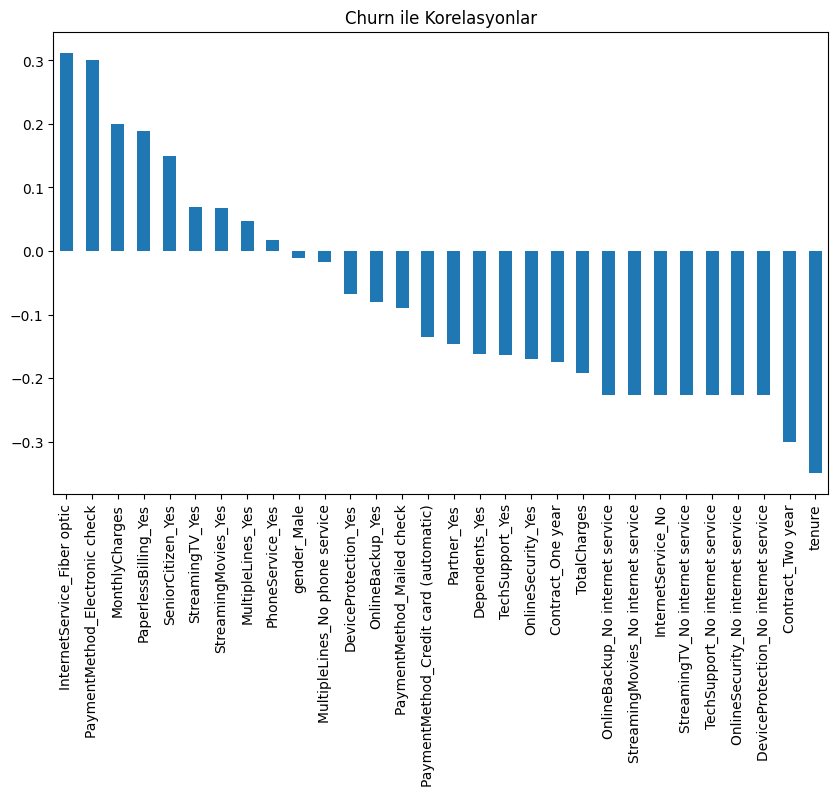

In [136]:
plt.figure(figsize=(10,6))
corr_with_target.drop("Churn").plot(kind="bar")
plt.title("Churn ile Korelasyonlar")
plt.show()

### Pozitif Korelasyonlar
- **InternetService_Fiber optic (0.31)** ve **PaymentMethod_Electronic check (0.30)** en yüksek pozitif korelasyona sahiptir. Bu durum, fiber internet kullanan ve elektronik fatura ödemesi yapan müşterilerin daha yüksek oranda kayıp yaşadığını göstermektedir.  
- **MonthlyCharges (0.20)** ve **PaperlessBilling_Yes (0.19)** de churn ile pozitif ilişkilidir. Yani yüksek aylık ücret ödeyen ve kağıtsız faturalama tercih eden müşterilerde kayıp oranı artmaktadır.  
- **SeniorCitizen_Yes (0.15)** churn ile pozitif ilişki göstermektedir. Yaşlı müşterilerde kayıp oranı daha yüksektir.  

### Negatif Korelasyonlar
- **tenure (-0.35)** en güçlü negatif korelasyona sahiptir. Uzun süreli müşterilerde churn oranı belirgin şekilde daha düşüktür.  
- **Contract_Two year (-0.30)** ve **Contract_One year (-0.18)** churn ile negatif ilişkilidir. Uzun vadeli sözleşmeler müşteri kaybını azaltmaktadır.  
 
Bu analiz, müşteri kaybını önlemek için hangi müşteri segmentlerine odaklanılması gerektiğini göstermektedir. Özellikle kısa süreli abonelik yapan ve yüksek aylık ücret ödeyen müşteriler churn açısından kritik bir gruptur.  

## Modellerin Kurulması

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2 , stratify=y , random_state=42)

sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

In [140]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1)}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.810256   0.681648  0.511236  0.584270  0.838139
1                  SVM  0.808791   0.713004  0.446629  0.549223  0.787422
2                  KNN  0.773626   0.572308  0.522472  0.546256  0.779531
3        Random Forest  0.795604   0.653386  0.460674  0.540362  0.815658
4              XGBoost  0.794872   0.630137  0.516854  0.567901  0.829758
5             LightGBM  0.802930   0.654804  0.516854  0.577708  0.839567


### Model Karşılaştırma Sonuçları

Veri seti eğitim (%80) ve test (%20) olarak ayrıldı. Sayısal değişkenler **StandardScaler** ile ölçeklendi. Ardından farklı sınıflandırma algoritmaları (Logistic Regression, SVM, KNN, Random Forest, XGBoost, LightGBM) test edildi.  

### Performans Özeti

- **Logistic Regression**: %81 doğruluk, ROC-AUC 0.84. Dengeli bir performans sergilemiş, özellikle ROC-AUC değeri yüksektir.  
- **SVM**: %81 doğruluk, yüksek precision (%71), ancak recall (%44) düşüktür. Pozitif sınıfı yakalamada zayıftır.  
- **KNN**: %77 doğruluk, recall %52 ile orta seviyede, ancak genel performansı diğer modellere göre daha düşüktür.  
- **Random Forest**: %79 doğruluk, ROC-AUC 0.82. Dengeli fakat recall düşüktür (%46).  
- **XGBoost**: %79 doğruluk, ROC-AUC 0.83. Recall %52 ile Logistic Regression’a yakın, güçlü bir alternatiftir.  
- **LightGBM**: %80 doğruluk, ROC-AUC 0.84 ile en yüksek değeri yakalamış. Recall %52 ile dengeli performans göstermiştir.  

### Özet Çıkarım

- **En güçlü modeller:** Logistic Regression ve LightGBM, yüksek ROC-AUC değerleriyle öne çıkmaktadır.  
- **Recall açısından:** Churn tahmininde pozitif sınıfı (kayıp müşteriler) doğru yakalamak önemlidir. Bu açıdan Lojistic Regresyon, XGBoost ve LightGBM daha dengeli sonuçlar vermektedir.  
- **SVM ve Random Forest:** Precision değerleri yüksek olsa da recall düşük kaldığı için müşteri kaybını yakalamada sınırlı kalmaktadır.  
- **KNN:** Genel performansı diğer modellere göre daha zayıf olduğu için tercih edilmesi önerilmemektedir.  

Sonuç olarak, churn tahmini için **LightGBM** , **XGBoost** ve **Lojistic Regresyon** modelleri öne çıkmaktadır. Bu modeller hem **doğruluk** hem de **ROC-AUC** açısından güçlü performans sergilemiş, **recall** değerleriyle de müşteri kaybını yakalamada daha dengeli bir yaklaşım sunmuştur.  

In [142]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1)}

results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
    results.append({
        "Model": name,
        "CV ROC-AUC Mean": cv_scores.mean(),
        "CV ROC-AUC Std": cv_scores.std()  })

cv_results = pd.DataFrame(results)
print(cv_results)

                 Model  CV ROC-AUC Mean  CV ROC-AUC Std
0  Logistic Regression         0.844761        0.013052
1              XGBoost         0.813388        0.019614
2             LightGBM         0.830240        0.016553


### Model Seçim Süreci

Veri seti üzerinde farklı sınıflandırma algoritmaları denenmiş ve performansları karşılaştırılmıştır. İlk aşamada tüm modeller test edilmiş, ardından en iyi sonuçları veren üç model belirlenmiştir: **Logistic Regression**, **LightGBM** ve **XGBoost**.  

Bu üç model, 10 katlı çapraz doğrulama yöntemiyle daha detaylı olarak değerlendirilmiştir. Çapraz doğrulama sonuçlarına göre:  
- **Logistic Regression** en yüksek ortalama ROC-AUC değerini (**0.845**) elde etmiş ve en düşük standart sapma ile en istikrarlı performansı göstermiştir.  
- **LightGBM** ikinci sırada yer almış (**0.830**), güçlü bir alternatif olarak öne çıkmıştır.  
- **XGBoost** ise üçüncü sırada kalmış (**0.813**) ve diğer modellere göre daha dalgalı sonuçlar vermiştir.  

### Sonuç
Yapılan analizler sonucunda en iyi üç model arasından **Logistic Regression** en başarılı ve en güvenilir model olarak seçilmiştir. Bu model, hem yüksek performansı hem de istikrarlı sonuçlarıyla müşteri kayıp tahmini için en uygun yöntem olarak değerlendirilmiştir.  

In [144]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

param_grid = {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"],
              "solver": ["saga"], "class_weight": ["balanced", None]}

grid = GridSearchCV(lr, param_grid = param_grid ,scoring="roc_auc", cv=10 , n_jobs=-1)
grid.fit(X_train,y_train)
best = grid.best_params_

lr_2 = LogisticRegression(random_state=42 , max_iter=1000, **best)
lr_2.fit(X_train, y_train)

y_pred = lr_2.predict(X_test)
y_prob = lr_2.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.70, 0.29, -0.05)

results = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    results.append({
        "Threshold": t,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)  })

df_results = pd.DataFrame(results)
print(df_results)

   Threshold  Accuracy  Precision    Recall  F1-score   ROC-AUC
0       0.70  0.773626   0.790123  0.179775  0.292906  0.838178
1       0.65  0.799267   0.801471  0.306180  0.443089  0.838178
2       0.60  0.804396   0.751412  0.373596  0.499062  0.838178
3       0.55  0.807326   0.706667  0.446629  0.547332  0.838178
4       0.50  0.808791   0.679245  0.505618  0.579710  0.838178
5       0.45  0.799267   0.628125  0.564607  0.594675  0.838178
6       0.40  0.783150   0.578125  0.623596  0.600000  0.838178
7       0.35  0.774359   0.554795  0.682584  0.612091  0.838178
8       0.30  0.753114   0.519192  0.721910  0.603995  0.838178


### 🔧 En İyi Modelin Kurulumu Ve Hiperparametre Optimizasyonu
Bu projede farklı sınıflama algoritmalarını **ROC-AUC** metriği üzerinden daha önce karşılaştırmıştık.  
Yapılan değerlendirmeler sonucunda en yüksek performansı **Lojistik Regresyon** modeli vermiştir.  
Bu nedenle nihai model olarak **Lojistik Regresyon** seçilmiş ve **GridSearchCV** ile en uygun hiperparametreler belirlenmiştir.  

### 📈 Eşik (Threshold) Analizi
Modelin olasılık tahminleri farklı eşik değerleri ile test edilmiştir. Amaç, müşteri kaybını doğru şekilde yakalamak için **Recall** değerini artırırken, iş kararları açısından kabul edilebilir bir **Precision** ve **F1-score** sağlamaktır.
- Yüksek eşik değerlerinde (ör. 0.70) **Precision** yüksek olsa da **Recall** çok düşüktür. Bu durumda churn olan müşterilerin büyük kısmı gözden kaçmaktadır.  
- Orta eşik değerlerinde (ör. 0.50) Precision ve Recall arasında daha dengeli bir performans elde edilmiştir.  
- Düşük eşik değerlerinde (ör. 0.30–0.35) **Recall** belirgin şekilde yükselmiş, Precision ise kabul edilebilir seviyede kalmıştır.  

### 🎯 Karar Noktası
- **0.35 eşik değeri** seçilmiştir.Bunun nedeni, müşteri kaybı problemlerinde **Recall** değerinin kritik olmasıdır. Yani kaybı önceden yakalayabilmek için daha fazla müşteriyi **riskli** olarak sınıflandırmak tercih edilmiştir.  
- 0.35 eşik değerinde:
  - **Recall:** %68.3 (yüksek yakalama oranı)  
  - **Precision:** %55.2 (makul doğruluk)  
  - **F1-score:** %61.1 (denge sağlanmış performans)  

### 💡 İş Çıkarımı
- Yüksek Recall sayesinde ayrılma riski taşıyan müşterilerin büyük kısmı tespit edilebilmektedir. Bu müşterilere yönelik kampanya, indirim veya özel hizmetler sunularak kaybın önüne geçmek mümkündür.  
- Precision değerinin orta seviyede olması, bazı müşterilerin yanlış şekilde **kayıp** olarak tahmin edilmesi anlamına gelir. Ancak müşteri kaybını önlemek için bu hata kabul edilebilir düzeydedir.  

In [146]:
coef_df = pd.DataFrame({"Feature": X_train.columns,"Coefficient": lr_2.coef_[0]})
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)
coef_df["Odds_Ratio"] = np.exp(coef_df["Coefficient"])
print(coef_df.sort_values("Abs_Coefficient", ascending=False).head(10))

                           Feature  Coefficient  Abs_Coefficient  Odds_Ratio
0                           tenure    -1.447474         1.447474    0.235163
25               Contract_Two year    -1.194340         1.194340    0.302904
10     InternetService_Fiber optic     0.730201         0.730201    2.075498
2                     TotalCharges     0.718479         0.718479    2.051311
24               Contract_One year    -0.643557         0.643557    0.525420
7                 PhoneService_Yes    -0.506461         0.506461    0.602624
13              OnlineSecurity_Yes    -0.393353         0.393353    0.674790
19                 TechSupport_Yes    -0.392184         0.392184    0.675580
26            PaperlessBilling_Yes     0.336095         0.336095    1.399473
28  PaymentMethod_Electronic check     0.312742         0.312742    1.367169


<Figure size 1000x800 with 0 Axes>

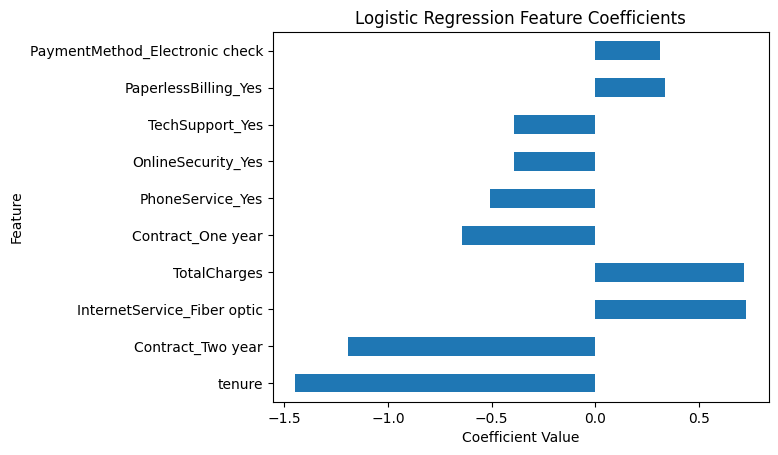

In [147]:
plt.figure(figsize=(10,8))
coef_df.head(10).plot(kind="barh", x="Feature", y="Coefficient", legend=False)
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


### 🔧 En Etkili Faktörler
- **Tenure (Müşteri süresi):** Uzun süreli müşterilerde kayıp riski çok düşük (Odds Ratio ≈ 0.23).  
- **Contract – Two year:** İki yıllık kontratlar kayıp riskini ciddi şekilde azaltıyor (OR ≈ 0.30).  
- **Contract – One year:** Bir yıllık kontratlar da kayıp riskini düşürüyor, ancak iki yıllık kadar güçlü değil (OR ≈ 0.52).  

### ⚠️ Churn Riskini Artıran Faktörler
- **InternetService – Fiber optic:** Fiber internet kullanan müşterilerde kayıp riski artıyor (OR ≈ 2.07).  
- **TotalCharges (Toplam fatura):** Yüksek fatura tutarı kayıp olasılığını artırıyor (OR ≈ 2.05).  
- **PaperlessBilling – Yes:** E-fatura kullanan müşterilerde kayıp riski daha yüksek (OR ≈ 1.40).  
- **PaymentMethod – Electronic check:** Elektronik çek ile ödeme yapan müşterilerde kayıp riski artıyor (OR ≈ 1.37).  

### 💡 Sadakati Artıran Hizmetler
- **PhoneService – Yes:** Telefon hizmeti alan müşteriler daha az kaybediliyor ediyor (OR ≈ 0.60).  
- **OnlineSecurity – Yes:** Güvenlik hizmeti kayıp riskini azaltıyor (OR ≈ 0.67).  
- **TechSupport – Yes:** Teknik destek alan müşterilerde kayıp riski daha düşük (OR ≈ 0.68).  

Müşteri kaybı analizinde en güçlü koruyucu faktörler uzun müşteri süresi ve uzun kontratlar olarak öne çıkmaktadır. Tenure değeri yüksek olan müşterilerin kayıp riski yeni müşterilere göre yaklaşık **dörtte bir** seviyesindedir, **iki yıllık kontratlar** ise kayıp olasılığını **%70** azaltmaktadır. Buna karşılık **fiber internet** kullanımı ve **yüksek fatura** tutarı müşteri kaybı riskini yaklaşık **iki kat** artırmaktadır. Ayrıca **e-fatura** ve **elektronik çek** gibi ödeme yöntemleri de riski **%30–40** oranında yükseltmektedir. **Telefon hizmeti**, **online güvenlik** ve **teknik destek** gibi ek hizmetler ise müşteri kaybı olasılığını **%30–40** azaltarak müşteri bağlılığını güçlendirmektedir. Genel olarak uzun kontratlar ve ek hizmetler sadakati artırırken, yüksek maliyet ve bazı ödeme yöntemleri churn riskini yükselten kritik faktörlerdir.

## 📊 Genel Proje Özeti – Churn Analizi

## 🔧 Veri Hazırlığı ve EDA
Proje başlangıcında veri seti üzerinde kapsamlı **Exploratory Data Analysis (EDA)** yapılmıştır.  
- **Veri düzenleme:** Eksik değerler analiz edilmiş ve veriden çıkarılmıştır.
- **Outlier analizi:** Aykırı değerler tespit edilerek model performansını bozmayacak şekilde ele alınmıştır.  
- **Özellik mühendisliği:** Kategorik değişkenler dummy encoding ile dönüştürülmüş, sayısal değişkenler ölçeklenmiştir.  
- **Korelasyon analizi:** Değişkenler arasındaki ilişkiler incelenmiş, yüksek korelasyonlu değişkenler belirlenmiştir.  

Bu adımlar sayesinde veri seti temizlenmiş, güvenilir ve modellemeye hazır hale getirilmiştir.

### 🔧 Modelleme Süreci
Farklı sınıflama algoritmaları ROC-AUC metriği üzerinden karşılaştırılmıştır.  
En yüksek performansı **Logistic Regression** modeli vermiştir. Bu nedenle nihai model olarak Logistic Regression seçilmiş ve GridSearchCV ile hiperparametre optimizasyonu yapılmıştır.  

Eşik (threshold) analizi sonucunda **0.35 threshold** seçilmiştir. Bu değer, churn problemlerinde kritik olan **Recall**’ı yükseltirken, Precision ve F1-score açısından kabul edilebilir bir denge sağlamaktadır.

### 📌 Bulguların Özeti
- **Sadakati artıran faktörler:** Uzun müşteri süresi (tenure), uzun kontratlar (özellikle 2 yıllık), telefon hizmeti, online güvenlik ve teknik destek. 
- **Müşteri kaybı riskini artıran faktörler:** Fiber internet kullanımı, yüksek toplam fatura tutarı, e-fatura ve elektronik çek ile ödeme yöntemleri.  
- **Odds Ratio yorumları:**  
  - Fiber internet kullanan müşterilerin kayıp riski diğerlerine göre yaklaşık **2 kat fazladır**.  
  - Yüksek fatura tutarı müşteri kaybı olasılığını **2 kat artırmaktadır**.  
  - İki yıllık kontratlar müşteri kaybı riskini **%70 azaltmaktadır**.  
  - Uzun süreli müşterilerin kayıp riski yeni müşterilere göre **%77 daha azdır**.  

## 🎯 Öneriler
1. **Riskli Segmentlere Odaklanma:** Fiber internet kullanan ve yüksek fatura tutarına sahip müşteriler kayıp açısından en riskli gruptur. Bu müşterilere özel kampanyalar, indirimler veya hizmet iyileştirmeleri yapılmalıdır.  
2. **Sadakati Güçlendirme:** Uzun kontratlı müşterilerin kayıp riski çok düşük olduğundan, kontrat yenileme ve uzun vadeli sözleşme teşvikleri artırılmalıdır.  
3. **Ek Hizmetlerin Teşviki:** Telefon, güvenlik ve teknik destek gibi hizmetler müşteri kaybını azaltmaktadır. Bu hizmetlerin paketlere dahil edilmesi veya cazip fiyatlarla sunulması müşteri bağlılığını güçlendirecektir.  
4. **Ödeme Yöntemleri Stratejisi:** Elektronik çek ve e-fatura kullanan müşterilerde kayıp riski daha yüksek çıkmıştır. Bu ödeme yöntemlerinde müşteri deneyimi iyileştirilmeli, alternatif ödeme seçenekleri daha cazip hale getirilmelidir.  
5. **Maliyet Yönetimi:** Yüksek fatura tutarı müşteri kaybını artıran en önemli faktörlerden biridir. Bu nedenle yüksek ödeme yapan müşterilere özel indirim veya avantajlı paketler sunulmalıdır.  

## 💡 Sonuç
Proje kapsamında veri seti düzenlenmiş, EDA yapılmış, korelasyon ve eksik değer analizleri gerçekleştirilmiş, ardından Logistic Regression modeli ile churn analizi yapılmıştır.  
Sonuçlar, müşteri kaybını azaltmak için **uzun kontrat ve ek hizmetlerin teşvik edilmesi**, **yüksek fatura ve fiber internet kullanan müşterilere özel stratejiler geliştirilmesi** gerektiğini göstermektedir. Bu öneriler uygulandığında müşteri kaybı önemli ölçüde azaltılabilir ve müşteri sadakati güçlendirilebilir.